In [14]:
import requests
import pandas as pd
import time
import concurrent.futures

In [15]:
#can make function to request by region
base_url = "https://na1.api.riotgames.com/lol"
riot_dev_key = "RGAPI-0faffa67-ae9f-43da-a6a3-3833ee6bc474"

In [16]:
def get_encrypted_summoners(mode, tier, division, page):
    #returns list of summoners and their information
    url = f"{base_url}/league/v4/entries/{mode}/{tier}/{division}?page={page}"
    headers = {"X-Riot-Token": riot_dev_key}
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        summoner_data = response.json()
        return summoner_data
    elif response.status_code == 429:
        retry_after = response.headers.get("Retry-After", None)
        if retry_after is not None:
            try:
                retry_after = int(retry_after)
            except ValueError:
                retry_after = 1
        else:
            retry_after = 1
        time.sleep(retry_after)
        return get_encrypted_summoners(mode, tier, division, page)
    else:
        print(f"error: {response.status_code}")
        return []
    
def get_enc_summoner_ids(mode, tier, division, page):
    #returns one encoded summoner id
    summoners = get_encrypted_summoners(mode, tier, division, page)
    summoner_ids = [summoner["summonerId"] for summoner in summoners]
    return summoner_ids

mode = "RANKED_SOLO_5x5"
tier = "IRON"
division = "I"
page = 1

summoner_ids = get_enc_summoner_ids(mode, tier, division, page)
print(summoner_ids)


['a4m7Efb1pI0lyQUFCc5dnenp070aCEIebx1PICmKIUepK6_8', 'MyqwP6mQpJLUN4eGsG0yFLBPyRG5U2XQhqnwBi-zRHKMXnYX', 'x_CN6-HEp84fyYXE6WFKZXdxc3iM2djFDeR7NdQUtvltn7qh', 'Vy2okaxTa0cT2_11VnJB_IBZ-DqG7ALy2-lhCBC1tcTfkMNW', 's8W8bcfwmd8GwXGnDlbD3qWdumrHAweeEJqnoxp1ClF3xfn5', '2hwEgu_CKdWfVCeTWL-A0iza4K02U8N-1-IrEKxw-cl33rII', 'NHlUZ3Iyfa5DT99NsAfwx37eEMoI3BkgHVBXM45ASZdl4cRS', 'cBMed3U_e12MhrwR4ypoYeLadXwhy-PvxTwEUXmUFpu-prt6', '6ljunLLPSpAVGcTw9QkXiRt8rFXkFdHfpCpplcKLFhU3KIEO', '-n8zKW2lCk0p5VzQTl-em0uk1heUI7zxfhlsLUE5sWiOfJkR', '5wT5PZTtrQJDu0IluW7hey66VtBBtj5lhXmEz-xgCOLkA2Ne', 'xlusxZm9UvB_khr7iJ7BC55RMGQoq3rw2gmJR4CZfjG_tWKR', 'AriLRdHuDhJ0OeXb38YaqIiXhNTBoboEk1-2wg9A_CIVai_8', '9DzOU1h4M4rcdVaxlt_QMT47nQw47b8riAOOZ681e6LzE08J', 'a3R8FJi2RXBHj9VPcl3S-H2lMI8p5X1onaFQAr6ho2OjAgAH', 'EmRM-sIXdHKMJXLDkSsHvkEXOn67JFsr04NmTbJiSZt09ZEt', 'eA917lo8riGiCE9XHBDPUVaQO7unNO6MLYAbu2eNsNcvhh5x', 'GcpVT-XCrsSuHI0nVdyKUTrb6PRhDnPWVZ7757p14VSaWJIp', '7HNkprytkLe9FM4Ew83G9N5ACy2IyATgfM15SFP3w_EIpqn7', 'TLJXwF11bR

In [17]:
def get_puuid(enc_summoner_id):
    #returns puuid by encoded summoner id
    url = f"{base_url}/summoner/v4/summoners/{enc_summoner_id}"
    headers = {"X-Riot-Token": riot_dev_key}
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        puuid = response.json()['puuid']
        return puuid
    else:
        print(f"error: {response.status_code}")
        return None
    
def get_puuids(enc_summoner_ids):
    puuids = []
    #initializes thread pool wth default # of threads, = to # CPU cores
    with concurrent.futures.ThreadPoolExecutor() as executor:
        #runs python .map() function concurrently, processing each item in enc_summoner_id divided among the threads concurrently
        results = executor.map(get_puuid, enc_summoner_ids)

        puuids.extend([result for result in results if result is not None])
    
    return puuids

puuids = get_puuids(summoner_ids)
print(puuids)

error: 429error: 429
error: 429

error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429

In [18]:
def get_match_ids(puuid, queue):
    #returns list of match_ids (str)
    #queue=490 for quickplay
    url = ""
    if queue != 1:
        #specificied queue type
        url = f"https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids?queue={queue}"
    else:
        #unspecified queue type
        url = f"https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids"
    headers = {"X-Riot-Token": riot_dev_key}
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        match_id_list = response.json()
        return match_id_list
    else:
        print(f"error: {response.status_code}")
        return []

queue = 490
puuid = get_puuid(summoner_ids[0])
match_ids = get_match_ids(puuid, queue)
print(match_ids)

['NA1_5162419587', 'NA1_5162395130', 'NA1_5162357491']


In [19]:
def get_match_info(match_id):
    #returns all match info for one match
    url = f"https://americas.api.riotgames.com/lol/match/v5/matches/{match_id}"
    headers = {"X-Riot-Token": riot_dev_key}
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        match_info = response.json()
        return match_info
    else:
        print(f"error: {response.status_code}")
        return []
match_id = match_ids[0]
match_info = get_match_info(match_id)
print(match_info)

{'metadata': {'dataVersion': '2', 'matchId': 'NA1_5162419587', 'participants': ['BCozmMyMvsGPaiSUpoVtgJosSltENCh7VSv9d5UESHZNDHFiYe7QWEOAWnwyoATJ6iDGA1AjG2GxZg', 'f6QOdurCnMdvvyhmoibzpf-pvj9EULfGt0ihUn851JkkqybIyqYb5gAGxUpoY2LSHjeYgqSpSkXvwg', 'daMlZD2PKBEc9rh-W0DaiHGDCWmoBneUI8ldO0xMyUk55n7TNOFpDHVOPmXdtIgtWlS7qEgQGBxuIA', 'uWPYz-Eivxb1LDyIPne7uRsBI7lmO8zCIEZR0SVLb482vAiUmBu8WLHqFTMJeGVdrbSzkdaeDeZptg', 'o3XAZxxu_Le3BJYtgJ432HW3JiyI3xzTnycdin79HmSds335nMpk_l4dS7rcqf5P1AjNxM4URml4Vg', 'N80BhDPiivgNYNStqp8Higtm3MD4OuBrWKttKPqEmZW3A8BR07Mi6-R9yF_dAXPVvK65d3WLhVNHAw', 'YJP5zuMGCo_vxNNgPaedGZ3ckcQIxfak8apCr9gFc2J15kn7JEoNnEc-0B6edOPCq1h0F_JEhzgexg', 'PuaAelvemeZExgIBcf06g2nUPElpXrqN1mq5MkY2mCFOZAJkl6Ooot5URChUeCBW74kaPbSf9qvs-g', 'gGZOjJQc5jabVF0CfdBBqxCToB8Y05jS64QCfC44QeutMNL4Ya2gGupqAqfJh9dESU--rXLAOXie2A', 'a0UyyN8aqujdLq_RkrMegUtT9yEPUoU-yWPlefpROJEhthbN2-_EQoExl-b_74nzNNsP3thYE2y-_w']}, 'info': {'endOfGameResult': 'GameComplete', 'gameCreation': 1732430701455, 'gameDuration': 2031, '

In [20]:
def get_game_duration(match_info):
    return (match_info['info']['gameDuration'])
gameDuration = get_game_duration(match_info)
print(gameDuration)
print(len(puuids))

2031
62


In [21]:
#model for overall game duration -> quickplay matches played
def get_avg_game_duration(puuid, queue):
    #returns average game duration based on player and queue
    match_ids = get_match_ids(puuid, queue)
    game_durations = []
    
    if match_ids is None:
        return 0
    for match_id in match_ids:
        match_info = get_match_info(match_id)
        if match_info and "info" in match_info:
            game_duration = (match_info['info']['gameDuration'])
            game_durations.append(game_duration)
    
    if game_durations:
        return sum(game_durations)/len(game_durations)
    else:
        return 0

def get_quickplay_match_count(puuid, queue=490):
    match_ids = get_match_ids(puuid, queue)
    if match_ids is not None:
        return len(match_ids)
    return 0

#queue = 1, all games
all_match_queue = 1
quickplay_queue = 490
data = []
for puuid in puuids:
    avg_game_duration = get_avg_game_duration(puuid, all_match_queue)
    quickplay_match_count = get_quickplay_match_count(puuid, quickplay_queue)
    data.append([avg_game_duration, quickplay_match_count])
    time.sleep(5)

df = pd.DataFrame(data, columns=["avg_game_duration", "quickplay_match_count"])

print(df.head(30))

error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429
error: 429

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

size of test set: 10
Mean Squared Error: 33.8330
R² Score: -0.0252


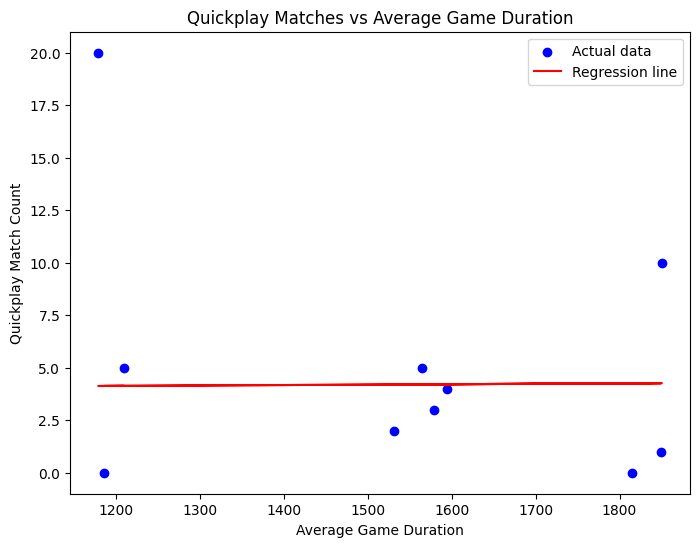

In [ ]:
df = df[df['avg_game_duration'] != 0]
x = df[["avg_game_duration"]].values
y = df["quickplay_match_count"].values


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)
print(f"size of test set: {len(X_test)}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual data') 
plt.plot(X_test, y_pred, color='red', label='Regression line')
plt.xlabel('Average Game Duration')
plt.ylabel('Quickplay Match Count')
plt.title('Quickplay Matches vs Average Game Duration')
plt.legend()
plt.show()